## Count number of samples

In [1]:
import json
from collections import Counter

def get_answer_type(answer: str) -> str:
    """Classify a single answer into unanswerable, yes/no, number, or other."""
    if answer == "unanswerable":
        return "unanswerable"
    if answer in ("yes", "no"):
        return "yes/no"
    if answer.replace(".", "", 1).isdigit():
        return "number"
    return "other"

def count_answer_types(filepath: str):
    with open(filepath, 'r') as f:
        data = json.load(f)

    types = []
    for item in data:
        # collect all non-empty answers
        answers = [
            a["answer"].strip().lower()
            for a in item.get("answers", [])
            if a.get("answer", "").strip()
        ]
        # choose majority vote or 'unanswerable'
        ref = Counter(answers).most_common(1)[0][0] if answers else "unanswerable"
        types.append(get_answer_type(ref))

    return Counter(types), len(data)

# Paths to the VizWiz annotation files
files = {
    'train': '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset2/annotations/train.json',
    'val':   '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset2/annotations/val.json',
    'test':  '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset2/annotations/test.json',
}

# Aggregate and display counts
for split, path in files.items():
    counts, total = count_answer_types(path)
    print(f"{split.capitalize()} set counts (Total: {total}):")
    for k in ['yes/no', 'number', 'other', 'unanswerable']:
        print(f"  {k}: {counts.get(k, 0)}")
    print()

Train set counts (Total: 2448):
  yes/no: 598
  number: 238
  other: 1216
  unanswerable: 396

Val set counts (Total: 524):
  yes/no: 126
  number: 48
  other: 268
  unanswerable: 82

Test set counts (Total: 524):
  yes/no: 129
  number: 52
  other: 277
  unanswerable: 66



In [2]:
def display_image(annotation_path, image_dir, samples_per_class=3, seed=4, image_size=(384, 384)):
    """
    Display a few samples from the dataset, grouped by answer type,
    showing the majority-vote (common) answer.
    """
    import json
    import os
    import random
    from collections import defaultdict, Counter
    from PIL import Image
    import matplotlib.pyplot as plt

    # === Load annotations ===
    with open(annotation_path, 'r') as f:
        data = json.load(f)

    # === Group by answer_type ===
    grouped = defaultdict(list)
    for item in data:
        atype = item.get('answer_type', 'unknown')
        grouped[atype].append(item)

    # === Set seed for reproducibility ===
    random.seed(seed)

    # === Display ===
    for atype, samples in grouped.items():
        chosen = random.sample(samples, min(samples_per_class, len(samples)))

        fig, axs = plt.subplots(1, samples_per_class, figsize=(samples_per_class * 4, 4))
        fig.suptitle(f"Answer Type: {atype}", fontsize=14)

        for i, sample in enumerate(chosen):
            image_path = os.path.join(image_dir, sample['image'])
            if not os.path.exists(image_path):
                print(f"[Missing] {image_path}")
                continue

            image = Image.open(image_path).convert("RGB").resize(image_size)
            question = sample['question']

            # compute majority-vote answer
            answers = [a["answer"].strip() for a in sample.get("answers", []) if a.get("answer", "").strip()]
            common_answer = Counter(answers).most_common(1)[0][0] if answers else 'N/A'

            axs[i].imshow(image)
            axs[i].set_title(f"Q: {question}\nA: {common_answer}", fontsize=8)
            axs[i].axis('off')

        plt.tight_layout()
        plt.subplots_adjust(top=0.75)  # adjust for suptitle
        plt.show()

In [3]:
train_annotation_path = '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset2/annotations/train.json'
train_image_dir = '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset2/train'
test_annotation_path = '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset2/annotations/test.json'
test_image_dir = '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset2/test'

## Train samples

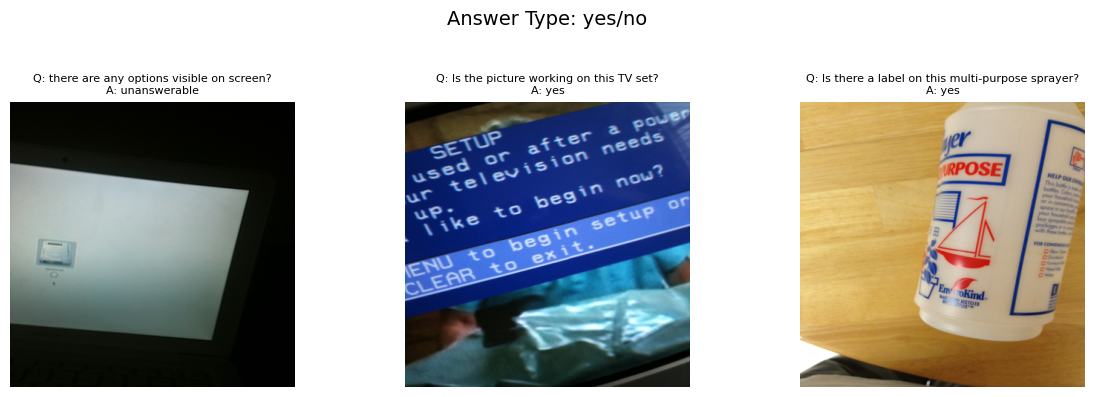

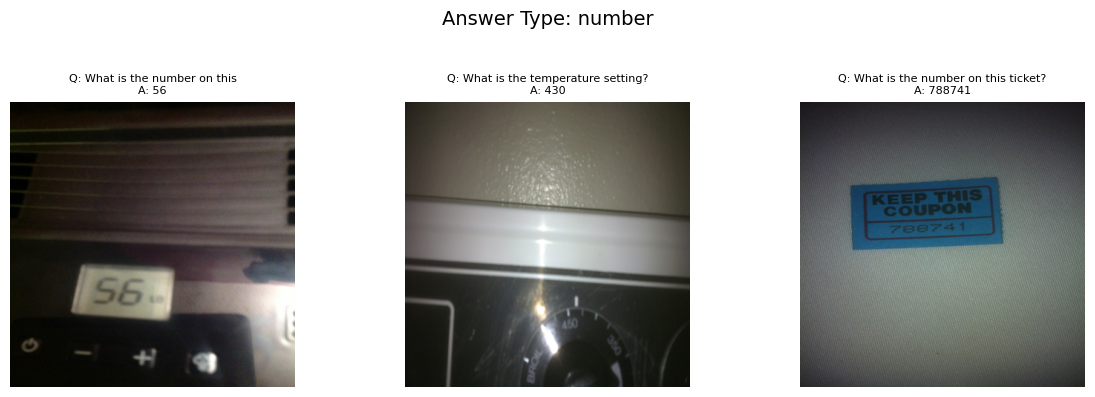

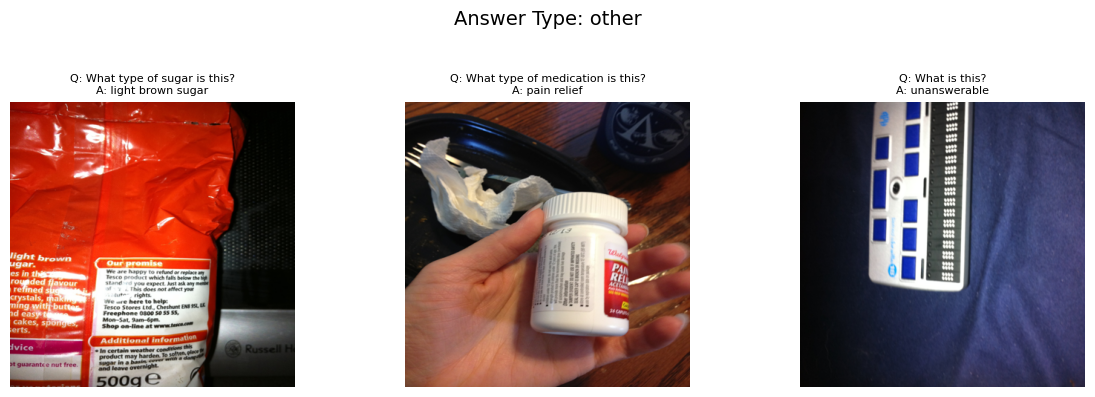

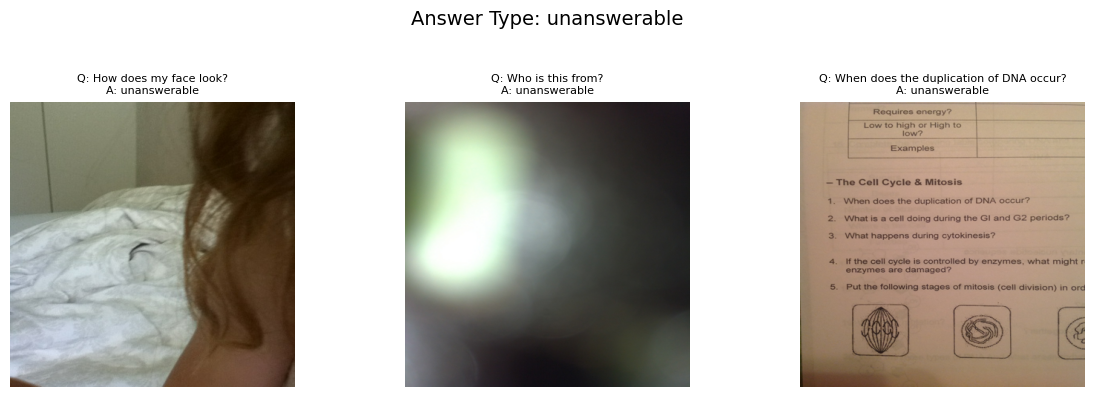

In [4]:
display_image(train_annotation_path, train_image_dir, samples_per_class=3)

## Test samples

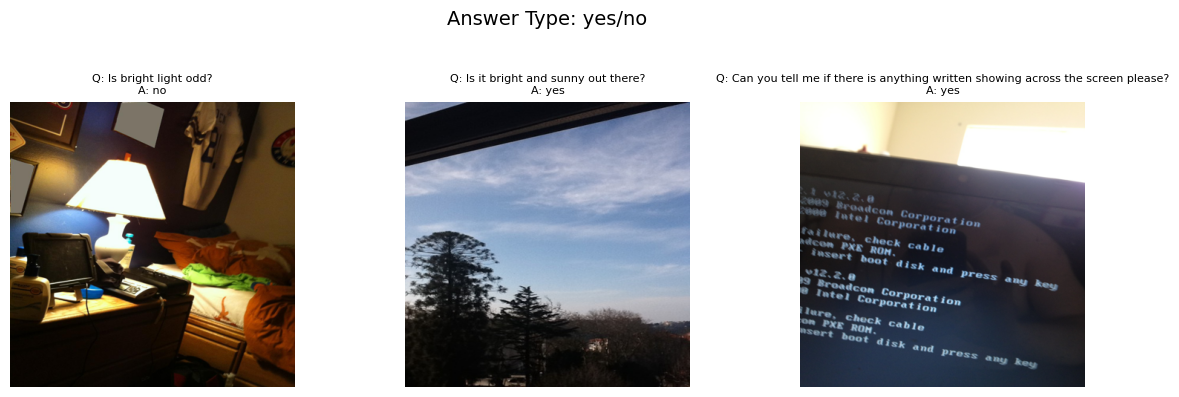

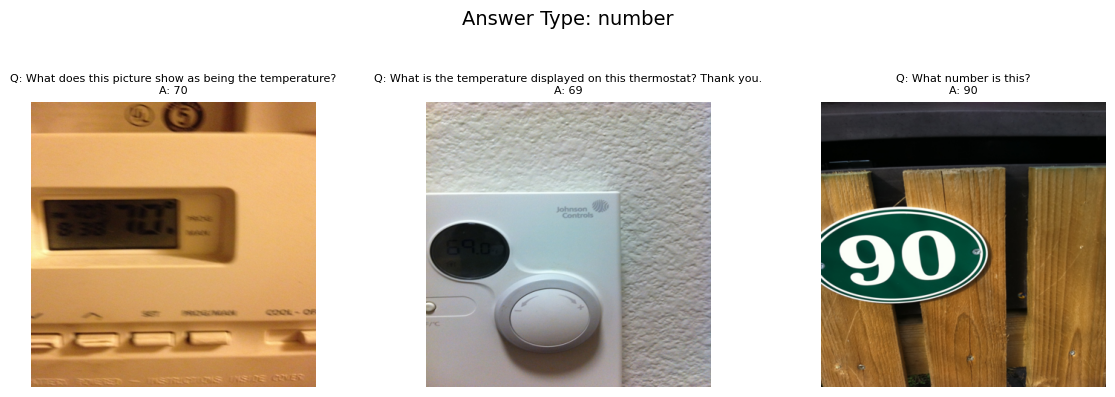

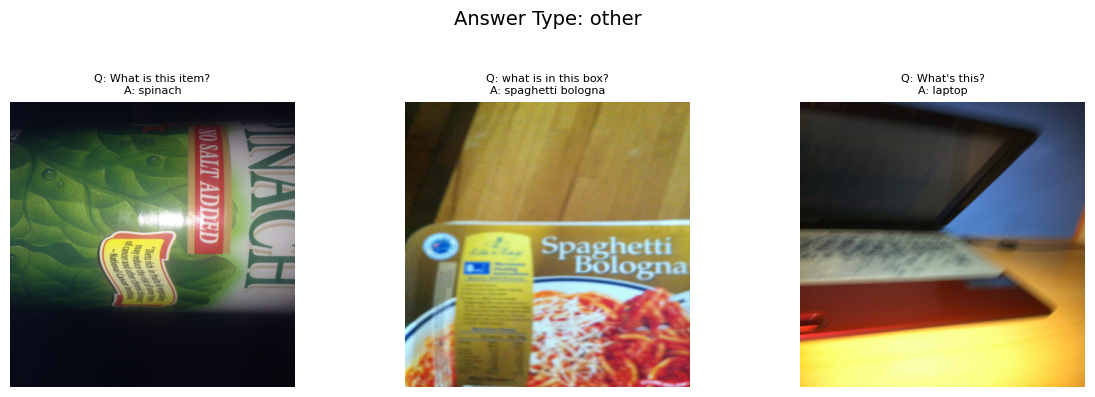

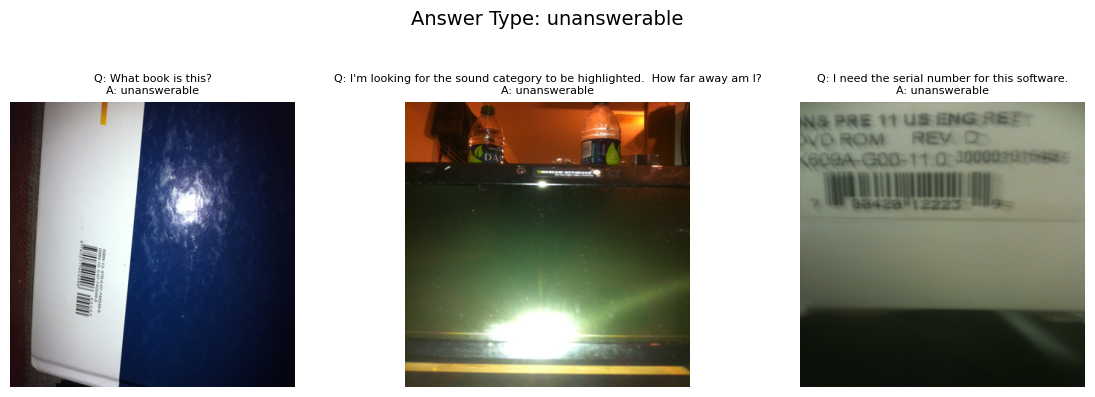

In [5]:
display_image(test_annotation_path, test_image_dir, samples_per_class=3)